Gaussian Naive Bayes:  continuous data titanic sample it uses Uses Gaussian probability density function
Multinomial Naive Bayes discrete data count based data for email spam detection
it uses Uses multinomial probability formula

i have used to predict passenger on the titanic survived or not based on certian features such as Age ,gender and class i have used naive based and filter and use the only valuable for the model logistic regression and i compare the accuracy and of both model which one is better and exploratory data anaylsis on it

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**data preprocessing and filtering **
drop passenger_id ,name because not relevant and sex column converted

Missing value in the Age filled with mean Age

In [3]:
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")

print(df.head())

   PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


In [4]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [5]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

i have convert the sex coloumn into numerical one hot encoding

In [6]:
dummies = pd.get_dummies(inputs.Sex)
inputs = pd.concat([inputs, dummies], axis='columns')

Drop the original 'Sex' column

In [7]:
inputs.drop(['Sex', 'male'], axis='columns', inplace=True)

In [8]:
print("missing ")
print(inputs.columns[inputs.isna().any()])

missing 
Index(['Age'], dtype='object')


In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [10]:
print("final dataset:")
print(inputs.head())

final dataset:
   Pclass   Age     Fare  female
0       3  22.0   7.2500   False
1       1  38.0  71.2833    True
2       3  26.0   7.9250    True
3       1  35.0  53.1000    True
4       3  35.0   8.0500   False


training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=42)

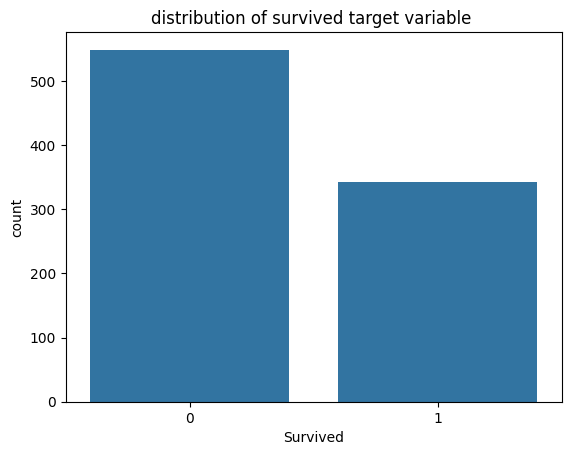

In [12]:
sns.countplot(x=target)
plt.title("distribution of survived target variable ")
plt.show()

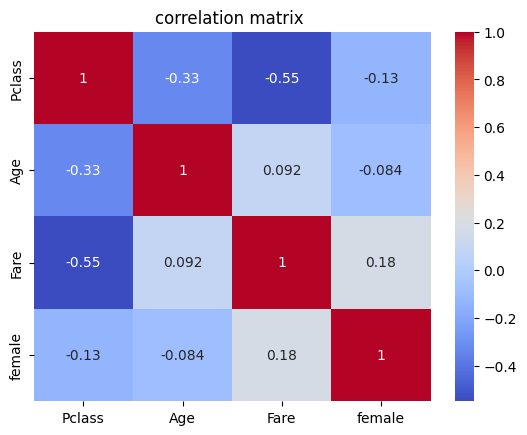

In [13]:
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm')
plt.title("correlation matrix ")
plt.show()

Naive Bayes Classifier

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"accuracy: {nb_accuracy:.2f}")

accuracy: 0.78


In [15]:
nb_cv_scores = cross_val_score(GaussianNB(), inputs, target, cv=5)
print(f"naive based cross validation scores: {nb_cv_scores}")
print(f"mean cross validation scores accuracy: {np.mean(nb_cv_scores):.2f}")

naive based cross validation scores: [0.70949721 0.79775281 0.78089888 0.75842697 0.79213483]
mean cross validation scores accuracy: 0.77


Logistic regeration

In [16]:
lr_model = LogisticRegression(max_iter=1000)

In [17]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
lr_predictions = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"logistic regression accuracy: {lr_accuracy:.2f}")

logistic regression accuracy: 0.79


In [19]:
lr_cv_scores = cross_val_score(LogisticRegression(max_iter=1000), inputs, target, cv=5)
print(f"logistic regression scores: {lr_cv_scores}")
print(f"mean cv accuracy: {np.mean(lr_cv_scores):.2f}")


print(f"naive based accuracy: {nb_accuracy:.2f}")
print(f"logistic regression accuracy: {lr_accuracy:.2f}")
if nb_accuracy > lr_accuracy:
    print("Naive based perform better ")
else:
    print("logistic regression better .")


logistic regression scores: [0.7877095  0.78089888 0.78651685 0.7752809  0.80337079]
mean cv accuracy: 0.79
naive based accuracy: 0.78
logistic regression accuracy: 0.79
logistic regression better .


The Purpose is text classfication model to distinguish between spam and non spam messsgaes Naive Bayes and performans to logistic regression

 MultiNomialNB
 I have load the dateset spam.csv
 i have changed the categorical label to machine learning and split the data set to trian and test sets

1.   I have load the dateset spam.csv
2.   i have changed the categorical label to binary label
3. Traning and test sets
4. feature extraction using count vector
5. train naive Bayes Model with MultinomialNB for x trian and y_trian and make predition for unseen data
6. as alternative we can use pipeline CountVectorizer to transform the text and Naive Bayes





In [20]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv")
df.head()
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

Filtering and preprocessing and correcting if there is empty values in the dataset

In [21]:

df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


divide it to trian and testset

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2, random_state=42)

convert the text data to numirical features

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [25]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]


emails_count = v.transform(emails)


model.predict(emails_count)

array([0, 1])

In [26]:

X_test_count = v.transform(X_test)


model.score(X_test_count, y_test)

0.9919282511210762

In [27]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])



In [28]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [29]:
clf.score(X_test, y_test)

0.9919282511210762

In [30]:
clf.predict(emails)

array([0, 1])

In [31]:
from sklearn.linear_model import LogisticRegression


logistic= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])


logistic.fit(X_train, y_train)


logistic.score(X_test, y_test)


logistic.predict(emails)

array([0, 0])

In [32]:
y_pred_nb = clf.predict(X_test)
y_pred_lr = logistic.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)


In [34]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [35]:
print("naive bayes performance ")
print(f"accuracy: {accuracy_nb:.4f},      precision: {precision_nb:.4f},recall: {recall_nb:.4f}, f1-score: {f1_nb:.4f}")

print("logisticRegression performance:")
print(f"accuracy: {accuracy_lr:.4f}, precision: {precision_lr:.4f}, recall: {recall_lr:.4f}, f1-score: {f1_lr:.4f}")

naive bayes performance 
accuracy: 0.9919,      precision: 1.0000,recall: 0.9396, f1-score: 0.9689
logisticRegression performance:
accuracy: 0.9857, precision: 0.9926, recall: 0.8993, f1-score: 0.9437
